# Create Hardiness Zones

Based on the hardines zones function in the xclim library: https://xclim.readthedocs.io/en/stable/indices.html#xclim.indices.hardiness_zones

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_path = '../data/processed/df_easternmountain_weather.parquet.gzip'
df = pd.read_parquet(df_path)
df['time']=pd.to_datetime(df['time'])
df.head()

,lat,lon,time,fahrenheit
0,35.25,-83.75,1985-01-01,51.242004
1,35.25,-83.50,1985-01-01,51.422016
2,35.25,-83.25,1985-01-01,50.450001
3,35.25,-83.00,1985-01-01,50.036034
4,35.25,-82.75,1985-01-01,51.296001


In [3]:
def temp_min(df,freq='YS'):
    ''' Takes DataFrame with temperature data and finds minimum temperature in the frequency given'''
    if df.index.name=='time':
        return df.groupby([pd.Grouper(level='time',freq=freq),'lat','lon']).min()
    else:
        return df.groupby([pd.Grouper(key='time',freq=freq),'lat','lon']).min()

In [4]:
small_df = df.iloc[:5000]
min_df = temp_min(small_df)
min_df.head()

fahrenheit
time       lat   lon               
1985-01-01 35.25 -83.75   -0.075985
                 -83.50    0.176014
                 -83.25    3.326014
                 -83.00   10.364019
                 -82.75   12.056025

In [31]:
#rolling window
def output_hardiness(df,window=30,temp_col='fahrenheit'):
    '''Get USDA Hardiness Zones with rolling window
    Args:
        df: DataFrame with DateTimeIndex and data of minimum temperature
        window: window of rolling period
        temp_col: name of column with minimum temperature
    Output:
        Series with Hardiness Zones mapped to the same index provided 
    '''
    window_df = df.rolling(window,min_periods=1).mean()
    binned = pd.cut(window_df[temp_col],bins=range(-60,70,5),labels=np.linspace(1,13,25))
    return binned

In [13]:
test = extract_hardiness(min_df)

In [51]:
def get_hardiness(df,freq='YS',window=30,temp_col='fahrenheit'):
    '''Get USDA Hardiness Zones from DataFrame containing temperature'''
    min_df = temp_min(df,freq)
    zones = output_hardiness(min_df,window,temp_col)
    return zones.astype(float)

In [52]:
zones = get_hardiness(df)

In [61]:
zones

time        lat    lon   
1985-01-01  35.25  -83.75    4.0
                   -83.50    4.5
                   -83.25    4.5
                   -83.00    4.5
                   -82.75    4.5
                            ... 
2023-01-01  39.50  -78.75    7.5
                   -78.50    7.5
                   -78.25    7.5
                   -78.00    7.5
                   -77.75    7.5
Name: fahrenheit, Length: 10881, dtype: float64

<Axes: xlabel='time'>

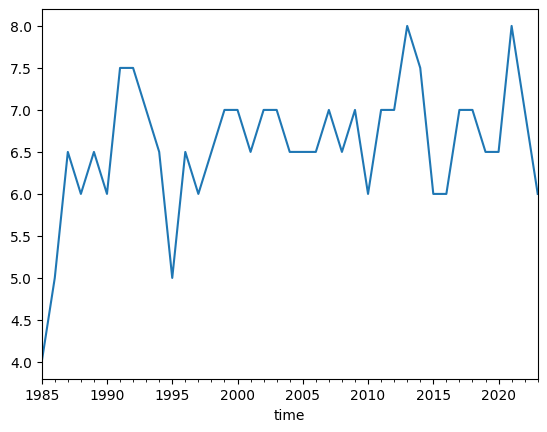

In [62]:
zones[:,35.25,-83.75].plot()